# Predicting Restaurant Food Cost 

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

# Import essential basic libraries

In [918]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets

In [919]:
df_train = pd.read_excel('Restaurant_food_cost_Train.xlsx')
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [920]:
df_test = pd.read_excel('Restaurant_food_cost_Test.xlsx')
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


# EDA

# Checking more info of 'df_train'

Columns Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

Length of the columns 9

No. of Rows 12690

Data Type of columns TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Checking for null values TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Visualizing null values AxesSubplot(0.125,0.125;0.62x0.755)


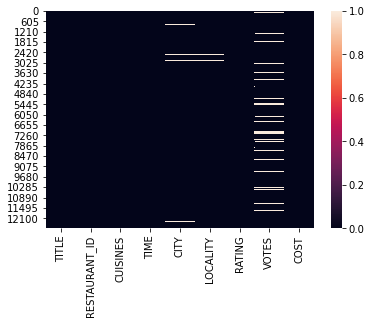

In [921]:
print('Columns', df_train.columns)
print('')
print('Length of the columns', len(df_train.columns))
print('')
print('No. of Rows', len(df_train))
print('')
print('Data Type of columns', df_train.dtypes)
print('')
print('Checking for null values', df_train.isnull().sum())
print('')
print('Visualizing null values', sns.heatmap(df_train.isnull()))

# Checking more info of 'df_test'

Columns Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

Length of the columns 8

No. of Rows 4231

Data Type of columns TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

Checking for null values TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

Visualizing null values AxesSubplot(0.125,0.125;0.62x0.755)


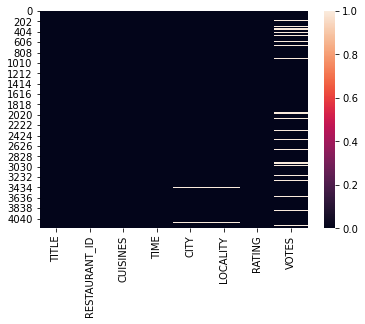

In [922]:
print('Columns', df_test.columns)
print('')
print('Length of the columns', len(df_test.columns))
print('')
print('No. of Rows', len(df_test))
print('')
print('Data Type of columns', df_test.dtypes)
print('')
print('Checking for null values', df_test.isnull().sum())
print('')
print('Visualizing null values', sns.heatmap(df_test.isnull()))

# Data Analysis

### Combining df_train & df_test

In [923]:
data_temp = df_train.append(df_test)
data_temp

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


# Treating columns one at a time

### Treating column - 'TITLE'

In [924]:
data_temp['TITLE'].value_counts().sort_index()

BAKERY                       392
BAKERY,BEVERAGE SHOP           2
BAKERY,CAFÉ                   18
BAKERY,CASUAL DINING           1
BAKERY,CONFECTIONERY           1
                            ... 
SWEET SHOP,BEVERAGE SHOP       1
SWEET SHOP,CASUAL DINING       2
SWEET SHOP,CONFECTIONERY       1
SWEET SHOP,DESSERT PARLOR      5
SWEET SHOP,QUICK BITES        70
Name: TITLE, Length: 123, dtype: int64

In [925]:
data_temp['TITLE'] = data_temp['TITLE'].str.split(',')
data_temp['TITLE'] = data_temp['TITLE'].str[0]

In [926]:
data_temp['TITLE'].value_counts().sort_index()

BAKERY             604
BAR                336
BEVERAGE SHOP      292
BHOJANALYA           1
CAFÉ              1024
CASUAL DINING     5516
CLUB                33
COCKTAIL BAR         7
CONFECTIONERY        4
DESSERT PARLOR     625
DHABA               61
FINE DINING        457
FOOD COURT         126
FOOD TRUCK          38
IRANI CAFE           1
KIOSK               76
LOUNGE             209
MEAT SHOP            3
MESS                68
MICROBREWERY        62
None              1287
PAAN SHOP            5
PUB                145
QUICK BITES       5793
SWEET SHOP         148
Name: TITLE, dtype: int64

##### There are 1287 count with value 'None' which is huge. May be we may have to replace the values with a category. For now i am replacing it with a category named 'Misc' as Miscellaneous

In [927]:
data_temp['TITLE'] = data_temp['TITLE'].replace(['None'], 'MISC')

In [928]:
data_temp['TITLE'].value_counts().sort_index()

BAKERY             604
BAR                336
BEVERAGE SHOP      292
BHOJANALYA           1
CAFÉ              1024
CASUAL DINING     5516
CLUB                33
COCKTAIL BAR         7
CONFECTIONERY        4
DESSERT PARLOR     625
DHABA               61
FINE DINING        457
FOOD COURT         126
FOOD TRUCK          38
IRANI CAFE           1
KIOSK               76
LOUNGE             209
MEAT SHOP            3
MESS                68
MICROBREWERY        62
MISC              1287
PAAN SHOP            5
PUB                145
QUICK BITES       5793
SWEET SHOP         148
Name: TITLE, dtype: int64

In [929]:
data_temp

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,MISC,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


### Treating column - 'CUISINES'

In [930]:
data_temp['CUISINES'].value_counts().sort_index()

Afghan, Mughlai                                                        1
African, Burger, Desserts, Beverages, Fast Food, Salad                 2
American                                                              10
American, Arabian, Fast Food, Lebanese                                 1
American, Asian, Burger, Chinese, Desserts, Panini, Italian, Momos     1
                                                                      ..
Vietnamese, Thai, Burmese, Japanese                                    1
Wraps                                                                  1
Wraps, Biryani, North Indian, Kebab, Desserts, Salad, Pizza            1
Wraps, Fast Food                                                       1
Wraps, Sandwich, Rolls, Fast Food, Burger, Pizza                       1
Name: CUISINES, Length: 5183, dtype: int64

In [931]:
data_temp['CUISINES'].dtypes

dtype('O')

In [932]:
data_temp['CUISINES'] = data_temp['CUISINES'].str.split(", ")
data_temp['CUISINES'] = data_temp['CUISINES'].str[0]

In [933]:
data_temp

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,Malwani,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,CASUAL DINING,13198,Asian,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,North Indian,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,Tibetan,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,North Indian,11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,MISC,1247,Biryani,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,Continental,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,Rolls,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [934]:
data_temp['CUISINES'].value_counts().sort_index()

Afghan          1
African         2
American      137
Andhra        189
Arabian       269
             ... 
Thai           63
Tibetan        33
Turkish        11
Vietnamese      5
Wraps           4
Name: CUISINES, Length: 106, dtype: int64

### Treating column - 'VOTES'

In [935]:
data_temp['VOTES'].value_counts().sort_values()

1205 votes     1
2180 votes     1
4173 votes     1
2030 votes     1
2043 votes     1
              ..
24 votes      81
29 votes      83
6 votes       87
22 votes      88
44 votes      92
Name: VOTES, Length: 2075, dtype: int64

In [939]:
data_temp['VOTES'].median()

164.0

In [940]:
data_temp['VOTES'] = data_temp['VOTES'].fillna('164')

In [941]:
data_temp['VOTES'] = data_temp['VOTES'].str.split(" ")
data_temp['VOTES'] = data_temp['VOTES'].str[0]

In [942]:
data_temp['VOTES'].isnull().sum()

0

In [943]:
data_temp

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,Malwani,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200.0
1,CASUAL DINING,13198,Asian,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500.0
2,CASUAL DINING,10915,North Indian,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800.0
3,QUICK BITES,6346,Tibetan,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,North Indian,11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287,NaN
4227,MISC,1247,Biryani,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469,NaN
4228,QUICK BITES,8617,Continental,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53,NaN
4229,QUICK BITES,6485,Rolls,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,164,NaN


### Treating column - 'RATING'

In [944]:
data_temp['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [950]:
data_temp['RATING'].dtypes

dtype('O')

In [961]:
train = data_temp[:12690]

In [962]:
test = data_temp[12690:]

In [964]:
x = train[['RESTAURANT_ID']]
y = train['COST']

In [965]:
from sklearn.linear_model import LinearRegression

In [966]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 40, test_size = 0.30)

In [968]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

In [969]:
Y_pred = linear_regressor.predict(x_test)

In [970]:
print(f'R2 score for train: {linear_regressor.score(x_train, y_train)}')
print(f'R2 score for test: {linear_regressor.score(x_test, y_test)}')

R2 score for train: 0.0009356552344718105
R2 score for test: 0.0023725386952234695


In [971]:
y_pred_test = linear_regressor.predict(x_test)
y_pred_train = linear_regressor.predict(x_train)

In [972]:
from sklearn.metrics import mean_squared_error
print(f'mean squared error train : {mean_squared_error(y_train, y_pred_train)}')
print(f'mean squared error test : {mean_squared_error(y_test, y_pred_test)}')

mean squared error train : 405318.48006538977
mean squared error test : 362641.8447637291


# END of EDA